In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
#clear warnings
import warnings;
warnings.simplefilter('ignore')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
! pip install cufflinks
import cufflinks as cf
print(__version__)
init_notebook_mode(connected=True)
cf.go_offline()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
5.5.0


In [ ]:
from datetime import datetime
dateparse=lambda x: datetime.strptime(x, '%d/%m/%Y')

In [ ]:
sales=pd.read_csv("/content/FrecastingAnalysis_project.csv", parse_dates=['Order Date'], date_parser=dateparse)
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
sales.shape

(9800, 18)

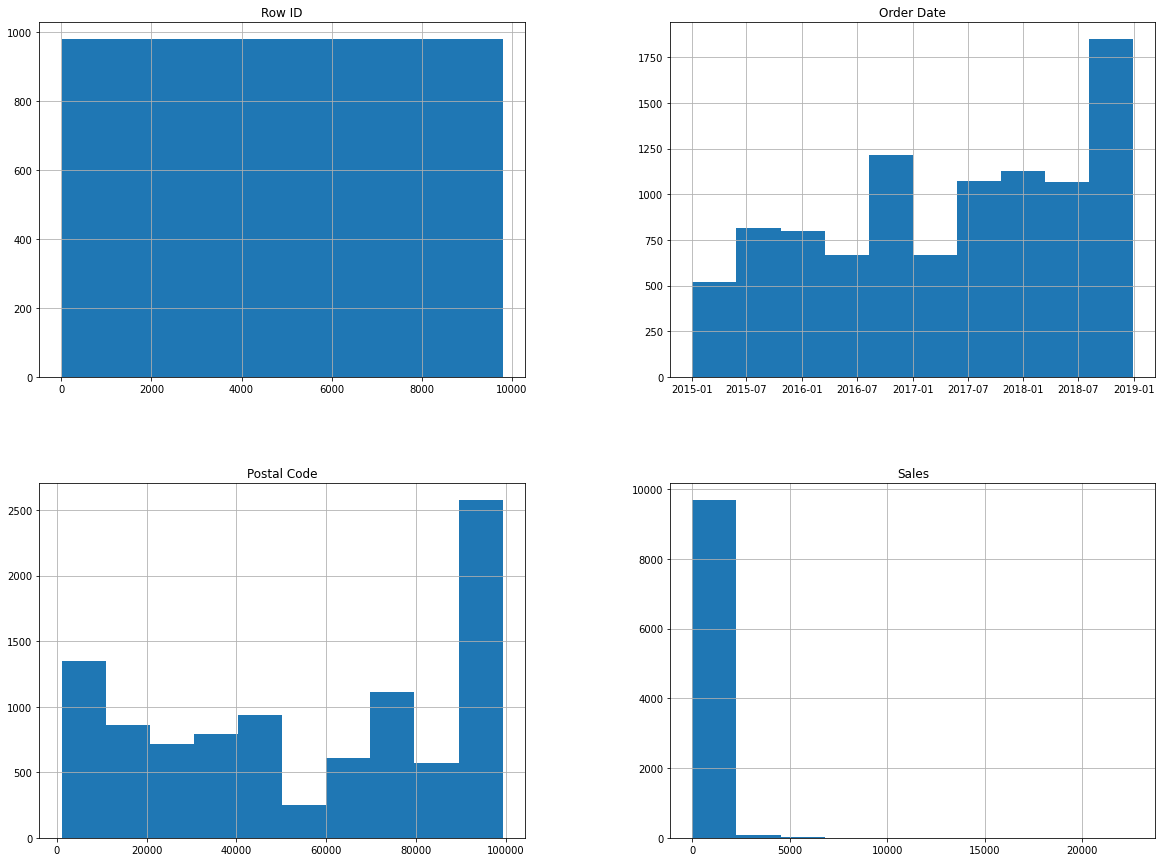

In [ ]:
sales.hist(figsize=(20,15))
plt.show()

Let us understand more about the dataset through various plots, statistical analysis of the various features and also the relation amongst these features

In [ ]:
sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
sales.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

Most of the data are categorical type, very few are of numerical type

In [ ]:
#correlation between the numerical feature types
sales.corr()

,Row ID,Postal Code,Sales
Row ID,1.000000,0.013645,0.001151
Postal Code,0.013645,1.000000,-0.024067
Sales,0.001151,-0.024067,1.000000


# Checking the rows with missing or null values 

In [ ]:
sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Hence, from the above output. There aer 11 null values in the postal code feature. we can remove them

In [ ]:
sales.dropna(inplace=True)
sales.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
sales.shape #few datapoints or rows have been dropped (11)

(9789, 18)

# Plotting and understanding the Sales Trend

In [ ]:
from datetime import datetime
dateparese=lambda x: datetime.strptime(x, '%d/%m/%Y')

In [ ]:
#converting oreder date to datetime
sales['Order Date']=pd.to_datetime(sales['Order Date'])
#create a month year column
sales['Year Month']=sales['Order Date'].apply(lambda x: x.strftime('%y-%m'))

In [ ]:
sales_trend=pd.DataFrame(sales.groupby('Year Month').sum()['Sales'].reset_index())
sales_trend

,Year Month,Sales
0,15-01,14205.7070
1,15-02,4519.8920
2,15-03,55205.7970
3,15-04,27906.8550
4,15-05,23644.3030
5,15-06,34322.9356
6,15-07,33781.5430
7,15-08,27117.5365
8,15-09,81623.5268
9,15-10,31453.3930


# Plotting the graph between year-month and sales

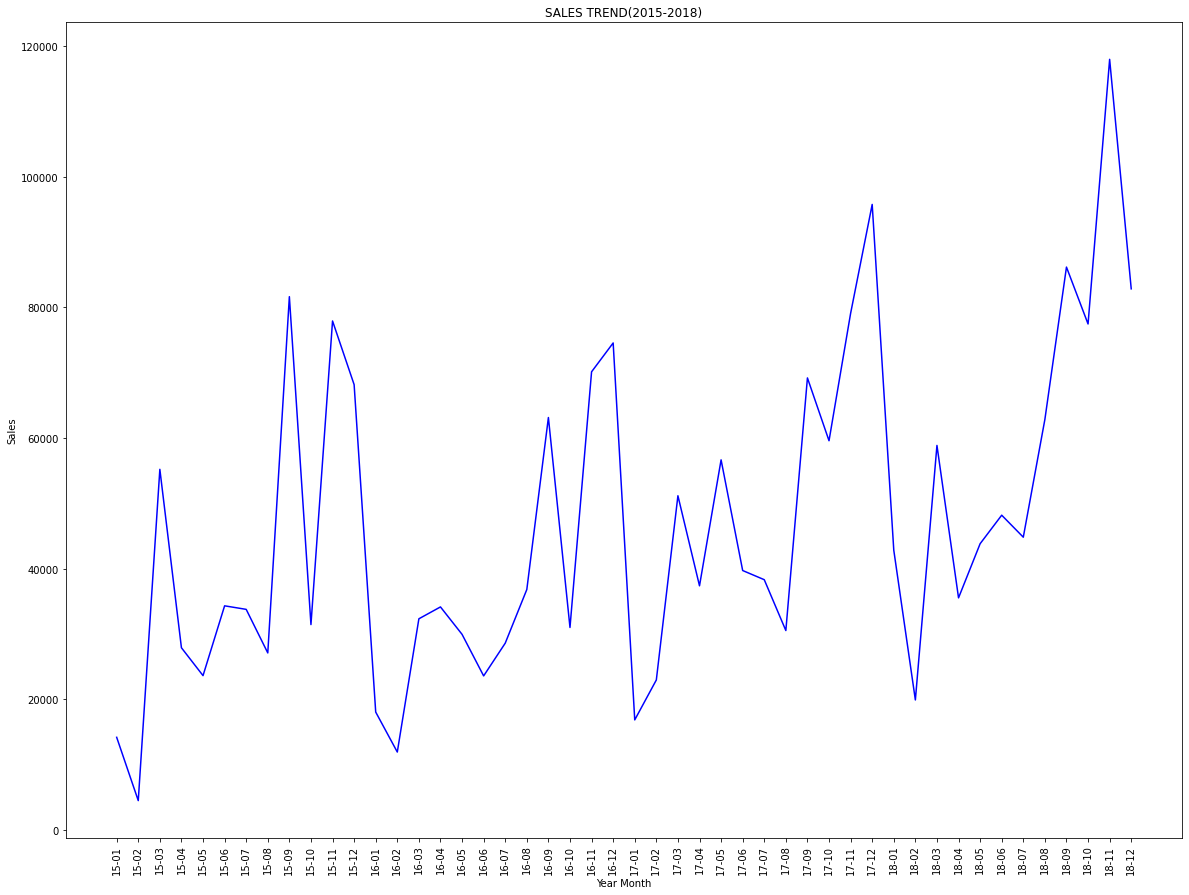

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation='vertical', size=10)
plt.plot(sales_trend['Year Month'], sales_trend['Sales'], color='blue')
plt.title('SALES TREND(2015-2018)')
plt.ylabel('Sales')
plt.xlabel('Year Month')
plt.show()

In [ ]:
fig=px.line(sales_trend, x="Year Month", y="Sales", title='SALES TREND (2015-2018)', width=1000, height=800)
fig.show()

# understanding the sales of the products in terms of quantity and the amount

In [ ]:
most_product=sales['Product Name'].value_counts().head(20)
most_product.iplot(kind='barh', title='MOST SELLING PRODUCTS', opacity=0.75, bargap=0.20, xTitle="Products", yTitle="value counts", color='rgb(12,128,128)')

In [ ]:
product_sales=pd.DataFrame(sales.groupby('Product Name').sum()['Sales'])
product_sales=product_sales.sort_values('Sales', ascending=False)

In [ ]:
product_sales[:10].iplot(kind='bar', xTitle='Products', yTitle='Amount of Sales', title='Top 20 product by amount of sales')

# Most preferred mode for shipping against sales amount

In [ ]:
preferred_shipping=sales.groupby('Ship Mode').sum()['Sales']
preferred_shipping.iplot(kind='bar', xTitle='Shipping Modes', yTitle='Amount Sold', title='Preferred Shipping Modes')

# Numbers of Product sold by category

In [ ]:
cat=sales.groupby(sales['Category']).count()['Sales']

In [ ]:
cat

Category
Furniture          2076
Office Supplies    5903
Technology         1810
Name: Sales, dtype: int64

In [ ]:
cat.iplot(kind='scatter',xTitle='Categories',yTitle='Amount Sold',title='Numbers of Product Sold by Category',
                         colorscale='-blues',fill=True)

# Number of products sold by sub-category

In [ ]:
sub_cat=sales.groupby(['Sub-Category']).count()['Sales']
sub_cat.iplot(kind='scatter', xTitle='Sub-Categories', yTitle='Number Sold', title='Number of Product Sold by Subcategory', colorscale='-greens', fill=False)

In [ ]:
cat_sales= sales.groupby(sales['Category']).sum()['Sales'].reset_index()
cat_sales= cat_sales.sort_values('Sales', ascending = False)
cat_sales.iplot(kind='scatter', x= 'Category', y ='Sales',
                xTitle='Number Sold',yTitle='Categories',title='Numbers of Product Sold by Category',
                         colorscale='-blues',fill=True)

In [ ]:
sub_sales= sales.groupby(sales['Sub-Category']).sum()['Sales'].reset_index()
sub_sales = sub_sales.sort_values('Sales', ascending = False)
sub_sales.iplot(kind='scatter', x= 'Sub-Category', y ='Sales',
                xTitle='Number Sold',yTitle='Categories',title='Numbers of Product Sold by Category',
                         colorscale='-blues',fill=True)

# Cities with highest sales

In [ ]:
city_count= sales['City'].value_counts()
city_count = city_count.sort_values(ascending = False)
city_count.head(20).iplot(kind='line',xTitle='City',yTitle='Number of Sales',title='Top 20 Cities With Highest Sales',
                         filename='Cufflinks - Bestfit Line Chart')

In [ ]:
city_sales= sales.groupby(sales['City']).sum()['Sales'].reset_index()
city_sales = city_sales.sort_values('Sales', ascending = False)
city_sales.head(20).iplot(kind='scatter',x ='City', y= 'Sales',
                xTitle='Sales',yTitle='Cities',title='Top 20 Cities With Highest Sales',
                         colorscale='-blues',fill=True)

# Now we will be using various smoothing  models and time series foercasting techniques to forecast the sales

Now splitting the data

In [ ]:
sales.shape

(9789, 19)

In [ ]:
#train-test splitting
train=sales.head(9000)
test=sales.tail(789)

Moving Average

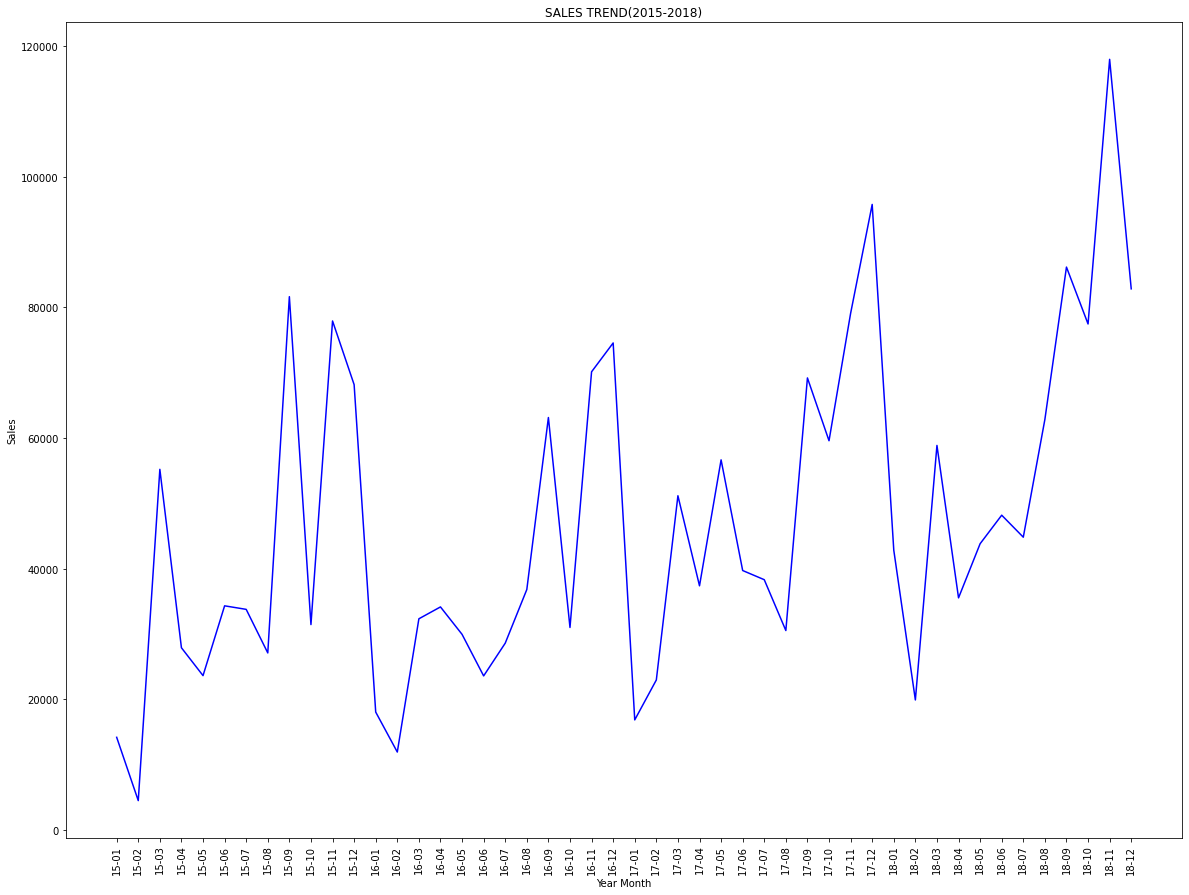

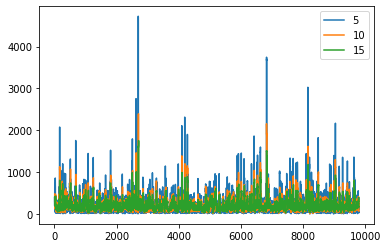

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation='vertical', size=10)
plt.plot(sales_trend['Year Month'], sales_trend['Sales'], color='blue')
plt.title('SALES TREND(2015-2018)')
plt.ylabel('Sales')
plt.xlabel('Year Month')
plt.show()
for i in range(5,20,5):
    sales['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")

# ACF and PACF plots

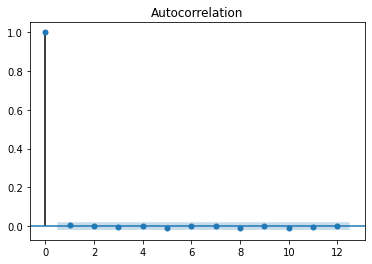

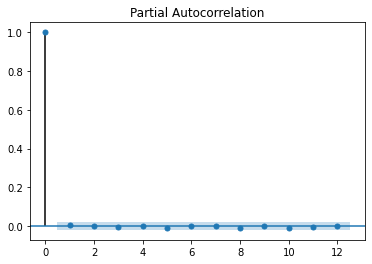

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(sales.Sales, lags=12)
tsa_plots.plot_pacf(sales.Sales, lags=12)
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [ ]:
ses_model=SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.8)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Sales)

95.12301402503043

# Holt Method

In [ ]:
hw_model=Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=1)
pred_hw=hw_model.predict(start=test.index[0], end=test.index[-1])
MAPE(pred_hw,test.Sales)

1972.8223716662014

# Final Model by combining both train and test

In [ ]:
ses_model=SimpleExpSmoothing(sales["Sales"]).fit(smoothing_level=0.8)

In [ ]:
ses_model.forecast(10)

9789    20.130831
9790    20.130831
9791    20.130831
9792    20.130831
9793    20.130831
9794    20.130831
9795    20.130831
9796    20.130831
9797    20.130831
9798    20.130831
dtype: float64

# ARIMA model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

sales_trend["Year Month"] = [float(str(i).replace("-", "")) for i in sales_trend["Year Month"]]
x=sales_trend.values
x=x.astype('float32')

def evaluate_arima_model(x, arima_order):
    #prepare training dataset
    x=x.asytpe('float32')
    train_size=int(len(x)*0.50)
    train, test=x[0:train_size], x[train_size:]
    history=[x for x in train]
    #make predictions
    predictions=list()
    for t in range(len(test)):
        model=ARIMA(history, order=arima_order)
        model_fit=model.fit(disp=0)
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse=sqrt(mean_squared_error(test,predictions))
    return rmse

Grid Search for p,d,q values

In [ ]:
split_point=len(sales_trend)-5
dataset, validation=sales_trend[0:split_point], sales_trend[split_point:]
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset=dataset.astype('float32')
  best_score, best_cfg=float('inf'), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order=(p,d,q)
        try:
          rmse=evaluate_arima_model(train, order)
          if rmse<best_score:
            best_score, best_cfg=rmse, order
            print('ARIMA%s RMSE=%.3f' %(order,rmse))
        except:
            continue
  print('Best ARIMA%s RMSE=%.3f' %(best_cfg, best_score))

In [ ]:
#load dataset
from pandas import read_csv
train_=read_csv('dataset.csv', header=None, index_col=0, squeeze=True)
train_=train_.astype('float32')
p_values=range(0,3)
d_values=range(0,3)
q_values=range(0,3)
warnings.filterwarnings("ignore")
evaluate_models(train_.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


Build model based on the optimized values

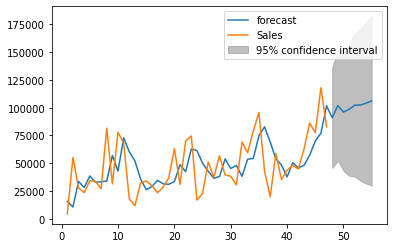

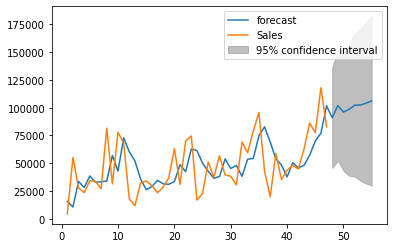

In [ ]:
x=train_.values
model=ARIMA(sales_trend['Sales'], order=(2,1,0))
model_fit=model.fit()
forecast=model_fit.forecast(steps=5)[0]
model_fit.plot_predict(1,55)

In [ ]:
val=pd.read_csv('validation.csv', header=None)
rmse=sqrt(mean_squared_error(val[1], forecast))
rmse

96218.61428878938

In [ ]:
forecast

array([ 91016.84817136, 101864.54720207,  96066.98561451,  98505.56944883,
       102243.85979696])

# Survival Analytics

In [ ]:
!pip install lifelines
import lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# XGBoost regressor for finding out the important features

In [ ]:
import xgboost as xgb
import pandas as pd
from xgboost import XGBRegressor

Dropping unnecessary columns

In [ ]:
data=data.drop(['Row ID','Order ID','Ship Date','Order Date','Customer ID','Customer Name','Product ID','Postal Code','Product Name'], axis=1)

In [ ]:
#using label encoding
data_encode=pd.read_csv("/content/FrecastingAnalysis_project.csv")

In [ ]:
data_encode=data_encode.drop(['Row ID','Order ID','Ship Date','Order Date','Customer ID','Customer Name','Product ID','Postal Code','Product Name'], axis=1)

In [ ]:
data_encode.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales'],
      dtype='object')

In [ ]:
data_encode.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680


In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data_encode['Ship Mode']= label_encoder.fit_transform(data_encode['Ship Mode'])

In [ ]:
data_encode['Ship Mode'].unique()

array([2, 3, 0, 1])

In [ ]:
#Segment', 'Country', 'City', 'State', 'Region','Category', 'Sub-Category'
data_encode['Segment']= label_encoder.fit_transform(data_encode['Segment'])
data_encode['Country']= label_encoder.fit_transform(data_encode['Country'])
data_encode['City']= label_encoder.fit_transform(data_encode['City'])
data_encode['State']= label_encoder.fit_transform(data_encode['State'])
data_encode['Region']= label_encoder.fit_transform(data_encode['Region'])
data_encode['Category']= label_encoder.fit_transform(data_encode['Category'])
data_encode['Sub-Category']= label_encoder.fit_transform(data_encode['Sub-Category'])

In [ ]:
data_encode.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales
0,2,0,0,194,15,2,0,4,261.9600
1,2,0,0,194,15,2,0,5,731.9400
2,2,1,0,265,3,3,1,10,14.6200
3,3,0,0,153,8,2,0,16,957.5775
4,3,0,0,153,8,2,1,14,22.3680


In [ ]:
data_encode['City'].unique()

array([194, 265, 153,  96, 450, 154, 271, 511, 436, 158, 372, 349, 207,
       404, 319, 286, 129, 514, 124, 322, 327, 486,  80, 166, 462, 215,
       287, 116, 128,  93, 408, 298, 387, 425,  24,  74, 350, 492,  94,
        51, 519,  41, 373, 416, 210, 362, 328, 156, 449, 438, 134,  65,
       432, 306, 147, 172, 397, 187, 513,   2, 120, 109, 517, 421, 285,
       126, 123, 471, 446, 239, 435,  49,  73, 312,  83, 212, 470,  92,
        35, 472, 240,  16,  18, 184, 427, 261, 196, 315, 249,  25, 268,
       273, 189, 487, 391, 367, 121, 369, 245, 502, 293, 208, 405, 266,
       247,  64, 326, 164, 216,  23, 334, 359,   8, 257, 209, 150, 104,
       360,  21, 167, 175, 238, 308, 291, 177,   9, 282, 428, 243, 182,
       114, 501, 495, 301, 409, 376, 453, 496,  86, 491,  60, 509,  78,
        68, 358, 314, 197, 341, 145, 485, 105,  45, 241,  19, 236, 346,
       135, 444, 297, 151, 264, 256, 429, 324, 163, 338,   4, 483, 149,
       407, 484, 418,  42, 498, 317, 345, 503, 218, 426, 411,  5

In [ ]:
x_new=data_encode.iloc[:,1:-1]
y_new=data_encode.iloc[:,-1]

In [ ]:
feat_encode=XGBRegressor()

In [ ]:
feat_encode.fit(x_new,y_new)

[13:15:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
data_encode.shape

(9800, 9)

In [ ]:
print(feat_encode.feature_importances_)

[0.03006593 0.         0.03382303 0.03588166 0.05256061 0.36936092
 0.47830787]


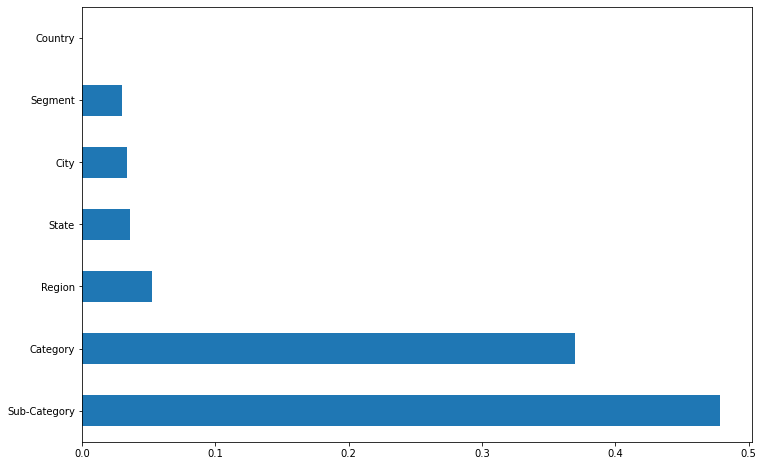

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(feat_encode.feature_importances_, index=x_new.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Sub-Category, Category and region are the three most important features